# Data Exploration

In [5]:
%load_ext autoreload
%autoreload 2


import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
from autoimmune_foundation.dataset import main


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# We should use the RED data
huprot_raw_df = pd.read_csv('../data/raw/LLD_vs_H_RawLog2MFI_635nm_red.csv',encoding='latin-1')
huprot_raw_df.columns = [col.split("_")[-1] for col in huprot_raw_df.columns]
huprot_raw_df = huprot_raw_df.drop(['Block','Column','Rows','Name'],axis=1)
huprot_raw_df = huprot_raw_df[huprot_raw_df['ID'] != 'ND']
huprot_raw_df = huprot_raw_df[huprot_raw_df['ID'] != 'Control']

In [8]:
huprot_raw_df

,ID,P092,P094,P099,P102,P104,P110,P121,P125,P126,...,P116,P120,P127,P130,P133,P134,P138,P148,IgG,gst
0,JHU00260.B1C1R2,5.8074,5.8455,5.7142,5.5999,5.6439,5.8948,5.7142,5.5850,5.7682,...,5.0224,4.8074,5.0444,5.0224,5.0444,4.9307,5.3923,5.3038,4.6439,5.1497
1,JHU00055.B1C2R2,5.9425,6.2668,5.7279,5.7004,5.7682,5.8580,5.8202,5.6439,5.9542,...,4.9773,4.8580,5.0875,5.3038,5.2854,5.1085,6.2854,5.7814,4.7549,5.1699
2,JHU00028.B1C3R2,5.9307,6.0112,5.8329,5.8704,5.9069,5.8329,5.6865,5.5850,5.9887,...,5.1085,4.8826,5.0000,5.2288,5.1898,5.1497,5.3750,5.7682,4.8074,5.1699
4,JHU00058.B1C5R2,8.0224,8.6457,7.2574,6.9484,7.1849,7.2046,7.6147,6.2668,7.5736,...,7.0389,6.1699,7.0389,6.5925,7.6366,6.3487,10.9480,8.0389,5.0444,5.2095
5,JHU00220.B1C6R2,5.8074,5.8580,5.7944,5.8074,5.7682,5.8826,5.6724,5.5546,5.8202,...,4.9069,4.9307,4.9307,4.9773,5.1293,5.2095,5.4594,5.5236,4.6439,5.1085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26326,JHU30334.B20C23R42,5.6294,5.7004,5.5699,5.5699,5.4919,5.6582,5.7004,5.5546,5.9069,...,4.9773,4.9773,5.0224,5.0444,5.2288,5.1699,5.3399,5.2479,4.7814,5.1898
26329,JHU30325.B20C26R42,5.5999,5.7682,5.6439,5.4757,5.5699,5.5850,5.5699,5.5850,5.9425,...,5.9658,5.0000,4.8580,5.1699,5.1085,4.9773,5.2095,5.1293,4.7814,5.1699
26330,JHU30413.B20C27R42,5.5078,5.6865,5.7682,5.6147,5.5546,5.5699,5.7415,5.5850,5.8704,...,4.8580,4.8329,4.8074,5.0661,5.0444,5.1085,5.2479,5.1699,4.8329,5.1497
26332,JHU30444.B20C29R42,5.7279,5.8329,5.5546,5.6582,5.6724,5.5699,5.5850,5.5078,5.9069,...,5.0875,4.8074,4.9773,5.1699,5.2668,4.8580,5.2479,5.2854,4.7549,5.1898


# Filtering based on STD

/var/folders/1r/l8_zwkvx7_g7b632hf_1517c0000gn/T/ipykernel_11092/4029398097.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


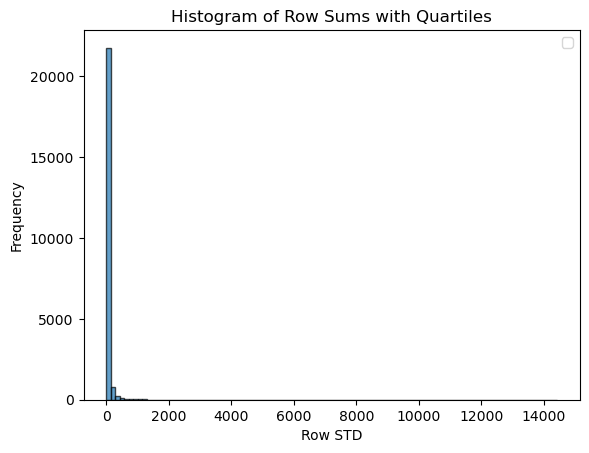

In [3]:
# Compute standard deviation for each row
row_stds = protein_df.std(axis=1)
# Plot histogram
plt.hist(row_stds, bins=100, edgecolor="black", alpha=0.7)

# Labels and legend
plt.xlabel("Row STD")
plt.ylabel("Frequency")
plt.title("Histogram of Row Sums with Quartiles")
plt.legend()
plt.show()

In [4]:
# Define a threshold (e.g., keep rows with std above the mean std)
row_stds = protein_df.std(axis=1)
threshold = np.percentile(row_stds,30)  # You can adjust this threshold
# Filter DataFrame
df_std_filtered = protein_df[row_stds > threshold]

/var/folders/1r/l8_zwkvx7_g7b632hf_1517c0000gn/T/ipykernel_11092/947139686.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


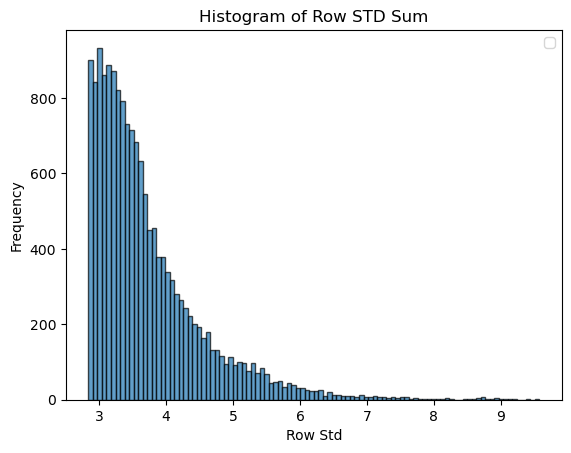

In [5]:
# Compute row sums
row_stds = df_std_filtered.std(axis=1)
# Plot histogram
plt.hist(np.log(row_stds), bins=100, edgecolor="black", alpha=0.7)

# Labels and legend
plt.xlabel("Row Std")
plt.ylabel("Frequency")
plt.title("Histogram of Row STD Sum")
plt.legend()
plt.show()

In [6]:
df_std_filtered

,CVC1,CVC2,CVC3,CVC4,CVC5,CVC6,CVC7,CVC8,CVC11,CVC15,...,HC14,HC15,HC16,HC19,HC20,HC21,HC22,HC23,HC24,HC25
ID,,,,,,,,,,,,,,,,,,,,,
JHU00260.B1C1R2,57.0,85.0,78.0,53.5,60.0,62.0,55.0,62.5,61.0,62.5,...,69.0,80.0,48.5,55.0,61.0,61.5,49.0,57.5,146.5,55.5
JHU00055.B1C2R2,75.0,92.5,104.5,67.0,81.5,73.0,75.5,76.0,87.5,79.0,...,69.0,105.5,62.0,80.5,84.5,80.5,73.5,59.0,220.0,75.5
JHU00028.B1C3R2,57.5,79.5,94.0,54.0,64.0,70.0,58.5,71.5,57.5,63.0,...,60.0,79.0,59.5,55.0,56.0,54.0,61.0,53.0,197.5,60.5
JHU00058.B1C5R2,132.0,165.0,145.0,85.5,111.5,109.0,101.0,149.5,119.0,109.5,...,127.0,249.0,109.0,95.5,134.0,139.0,110.5,89.5,428.5,254.0
JHU00220.B1C6R2,63.5,89.0,86.0,58.5,58.0,67.0,55.0,63.5,61.5,66.0,...,64.5,67.5,57.5,59.5,57.0,66.5,55.5,56.0,188.0,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JHU30334.B20C23R42,117.5,129.5,95.0,80.0,109.0,87.0,86.0,97.0,78.0,79.5,...,96.0,85.0,72.0,67.5,76.5,82.5,66.5,74.0,207.5,88.5
JHU30325.B20C26R42,131.5,114.5,104.0,79.0,119.0,91.5,85.0,88.5,88.5,89.5,...,98.5,86.0,78.5,67.0,83.5,82.5,73.0,71.0,222.0,114.0
JHU30413.B20C27R42,123.5,84.5,77.5,75.0,91.0,78.5,80.5,78.0,72.5,77.5,...,95.0,86.0,74.0,64.5,76.0,73.5,64.0,65.5,102.0,90.5


In [123]:
df_std_filtered.reset_index().to_csv('../data/processed/protein_patients_filtered_by_std.csv')

# Filtering based on QUARTILES

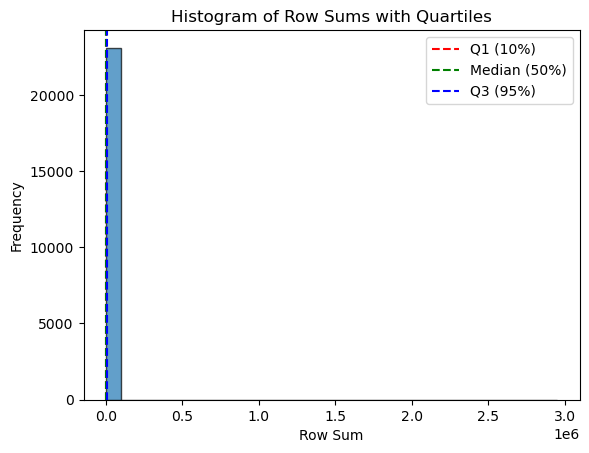

In [111]:
# Compute row sums
row_sums = protein_df.sum(axis=1)

# Compute quartiles
q1, q2, q3 = np.percentile(row_sums, [10, 50, 90])

# Plot histogram
plt.hist(row_sums, bins=30, edgecolor="black", alpha=0.7)

# Add vertical lines for quartiles
plt.axvline(q1, color='r', linestyle='dashed', label="Q1 (10%)")
plt.axvline(q2, color='g', linestyle='dashed', label="Median (50%)")
plt.axvline(q3, color='b', linestyle='dashed', label="Q3 (95%)")

# Labels and legend
plt.xlabel("Row Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Row Sums with Quartiles")
plt.legend()
plt.show()

In [59]:
discarted_df = protein_df[row_sums > q3]

In [60]:
discarted_df.transpose().describe()

ID,JHU00058.B1C5R2,JHU00110.B1C9R2,JHU00274.B1C16R2,JHU00072.B1C23R2,JHU00022.B1C26R2,JHU07093.B1C32R2,JHU00030.B1C3R4,JHU00353.B1C7R4,JHU00362.B1C10R4,JHU00140.B1C14R4,...,JHU29142.B20C11R40,Auto-antigen.B20C16R40,Auto-antigen.B20C24R40,JHU02532.B20C25R40,JHU30412.B20C29R40,Auto-antigen.B20C4R42,JHU30387.B20C5R42,Auto-antigen.B20C6R42,JHU30436.B20C9R42,Auto-antigen.B20C16R42
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,159.611111,154.755556,135.244444,151.933333,143.666667,147.366667,296.666667,152.455556,153.133333,607.288889,...,131.566667,156.577778,152.211111,450.722222,123.788889,286.122222,122.922222,455.344444,235.977778,518.688889
std,102.565882,193.635806,111.237237,102.415131,95.769669,201.464959,977.193099,180.132427,219.365314,1103.984099,...,128.669794,102.063369,131.648011,571.165988,116.782553,154.219964,84.185736,1036.080655,553.155329,1810.760850
min,69.000000,52.000000,63.500000,67.000000,71.500000,50.000000,50.000000,46.500000,59.500000,55.000000,...,75.500000,67.000000,65.000000,94.500000,67.500000,150.000000,58.500000,87.000000,55.000000,112.000000
25%,96.500000,81.000000,77.000000,93.500000,91.500000,68.500000,72.500000,51.500000,77.500000,64.500000,...,96.000000,98.500000,101.000000,190.000000,81.000000,221.500000,90.000000,171.500000,90.500000,219.000000
50%,120.500000,104.500000,91.500000,122.000000,120.500000,81.000000,91.000000,68.000000,89.000000,90.000000,...,106.500000,117.000000,118.000000,284.000000,91.500000,260.000000,100.000000,226.000000,111.500000,249.000000
75%,168.000000,130.000000,143.000000,179.500000,163.500000,132.500000,109.500000,169.500000,133.500000,473.000000,...,126.000000,167.500000,142.000000,455.500000,129.500000,305.000000,128.500000,331.000000,143.500000,276.500000
max,518.500000,1247.500000,602.000000,682.000000,663.500000,1221.500000,6270.500000,953.500000,1291.000000,4676.000000,...,962.000000,592.000000,815.000000,3528.500000,834.500000,1200.000000,556.500000,7101.000000,3703.500000,12387.500000


In [61]:
# Filter DataFrame to keep only rows where the sum is smaller than Q3
df_filtered = protein_df[row_sums < q3]

In [62]:
df_filtered.describe()

,CVC1,CVC2,CVC3,CVC4,CVC5,CVC6,CVC7,CVC8,CVC11,CVC15,...,HC14,HC15,HC16,HC19,HC20,HC21,HC22,HC23,HC24,HC25
count,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,...,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000,20823.000000
mean,90.872665,93.777650,84.839288,72.146016,87.161264,75.841305,75.940859,83.812923,71.749916,76.571796,...,76.349974,82.792249,69.591269,67.028022,69.056788,71.528910,67.304111,62.301806,166.535490,73.004490
std,26.094517,26.911162,24.939158,9.416944,21.083852,18.192935,17.830809,27.060180,18.131062,19.886929,...,24.405393,25.396664,11.254029,21.204767,16.186517,21.120481,17.383438,11.232613,85.096017,22.072804
min,49.500000,54.500000,57.500000,45.000000,51.000000,48.000000,46.500000,52.000000,48.500000,52.000000,...,50.500000,53.500000,47.000000,45.000000,44.000000,47.000000,43.000000,41.000000,46.500000,42.500000
25%,80.500000,81.000000,75.500000,66.000000,77.500000,68.500000,68.500000,74.000000,65.000000,69.500000,...,69.000000,74.000000,63.500000,60.500000,62.000000,64.500000,60.500000,56.500000,110.000000,64.000000
50%,88.500000,89.000000,81.500000,72.500000,85.000000,74.000000,75.000000,80.500000,70.000000,75.000000,...,74.500000,80.500000,69.500000,66.000000,68.000000,70.500000,66.000000,62.500000,144.500000,70.000000
75%,97.500000,100.500000,89.000000,77.500000,93.500000,79.500000,80.500000,87.500000,75.500000,80.500000,...,79.500000,87.000000,74.500000,71.000000,73.500000,76.000000,71.500000,67.000000,197.000000,77.500000
max,1365.000000,1837.000000,1467.000000,420.000000,1629.500000,943.500000,830.500000,1090.500000,1043.500000,1275.500000,...,1529.000000,1373.500000,463.500000,1375.000000,848.000000,987.500000,772.500000,529.500000,1138.500000,1119.500000


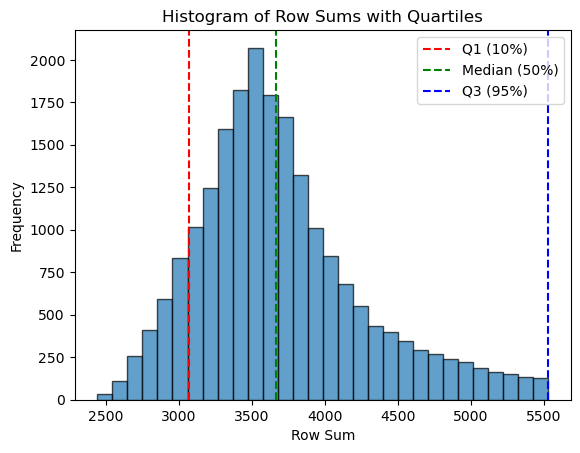

In [63]:
# Compute row sums
row_sums = df_filtered.sum(axis=1)

# Plot histogram
plt.hist(row_sums, bins=30, edgecolor="black", alpha=0.7)

# Add vertical lines for quartiles
plt.axvline(q1, color='r', linestyle='dashed', label="Q1 (10%)")
plt.axvline(q2, color='g', linestyle='dashed', label="Median (50%)")
plt.axvline(q3, color='b', linestyle='dashed', label="Q3 (95%)")

# Labels and legend
plt.xlabel("Row Sum")
plt.ylabel("Frequency")
plt.title("Histogram of Row Sums with Quartiles")
plt.legend()
plt.show()